#***Hierarchical Clustering***





In [1]:
import pandas as pd
import numpy as np 
import scipy 
from scipy.cluster.hierarchy import dendrogram , linkage
from scipy.cluster.hierarchy import fcluster
#Distance Tools
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
#that's the same thing as Hierarchical Clustering
import sklearn.metrics as sn 
#to evaluate our model

###***Setting our print Options***
Number rotation after the coma , eg: 1.25488644 = (np.set_printoptions(precison=4) ===> 1.2549 .\
Set our Plot Parameters

In [2]:
np.set_printoptions(precision=4 , suppress=True)
plt.figure(figsize=(10,8))
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv('/content/mtcars.csv')
df.columns
X = df.iloc[:,[1,3,4,6]].values
Y = df.iloc[:,[9]].values #Target variable ( am column) that variable describe whether the car have an manual or automatic transmission

###***Using Scipy to generate Dendograms*** 
we'll call the linkage function on dataset X to carries out the HC on our data

In [4]:
Z = linkage(X,'ward')


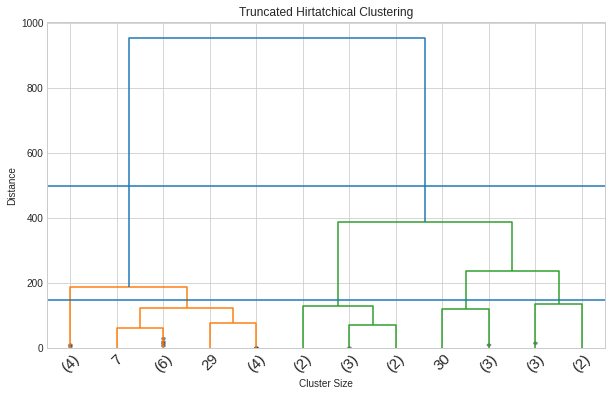

In [6]:
dendrogram(Z,truncate_mode='lastp' ,p=12 ,leaf_rotation=45 , leaf_font_size=15 , show_contracted=True)
plt.title('Truncated Hirtatchical Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

#Set a line on our Y-Axis (Maximum distance between a point and its nearest neighbor)
#so that we can count how many clusters to use in our Model
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large


###***Generating Hierarchical Clusters***
we'll create a variable that represents the number of clusters k and set it on 2 clusters **K=2** .

Then we need to instantiate an **Agglomerative Clustering Object** 

In [7]:
k = 2

hclustering = AgglomerativeClustering(n_clusters=k , affinity='euclidean' , linkage='ward')
#Affinity parameter the distance metric as mayor of similarity (Euclidean , Manhattan ..)
hclustering.fit(X)

#We'll use our sklearn libary to Score our model
#We'll pass on our target variable Y and the Predicted values that have generated
#From our Hierarchical Clustering Model
sn.accuracy_score(Y,hclustering.labels_)

0.78125

We're gonna deploy every different combination parameters that are possible with this particular dataset and see which produces the best model results

In [8]:
hclustering = AgglomerativeClustering(n_clusters=k , affinity='euclidean' , linkage='complete')

hclustering.fit(X)
sn.accuracy_score(Y,hclustering.labels_)

0.4375

In [9]:
hclustering = AgglomerativeClustering(n_clusters=k , affinity='euclidean' , linkage='average')

hclustering.fit(X)
sn.accuracy_score(Y,hclustering.labels_)

0.78125

In [10]:
hclustering = AgglomerativeClustering(n_clusters=k , affinity='manhattan' , linkage='average')

hclustering.fit(X)
sn.accuracy_score(Y,hclustering.labels_)

0.71875

the last combination has the highest accuracy score with 0.71875 